# Análisis Inicial de anomalias JLERGA 30/11/2023 

In [86]:
# Importando las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [87]:
# Cargar el dataset desde un archivo CSV actualizado
dataset = pd.read_csv('20231127171227_total.csv', sep=';')

# Crear una copia del dataset original para uso posterior
dataset_original = dataset.copy()

# Obtener el tamaño del dataset
numero_filas, numero_columnas = dataset.shape

# Mostrar el tamaño del dataset
print(f"El dataset tiene {numero_filas} filas y {numero_columnas} columnas.")


El dataset tiene 9150000 filas y 2 columnas.


In [88]:
# Seleccionar las primeras 2 millones de instancias
dataset = dataset.head(2000000)

In [89]:
# Visualización de los datos
dataset

,valor,timestamp
0,286.40,27-Nov-2023 17:12:27
1,274.56,27-Nov-2023 17:12:27
2,259.84,27-Nov-2023 17:12:27
3,279.68,27-Nov-2023 17:12:27
4,273.28,27-Nov-2023 17:12:27
...,...,...
1999995,50.24,27-Nov-2023 17:28:09
1999996,69.12,27-Nov-2023 17:28:09
1999997,36.16,27-Nov-2023 17:28:09
1999998,-31.36,27-Nov-2023 17:28:09


In [90]:
# Mostrar las estadísticas básicas del dataset
print(dataset.describe())

              valor
count  2.000000e+06
mean   9.863667e+01
std    4.879425e+02
min   -9.945600e+02
25%   -8.512000e+01
50%    3.200000e+00
75%    1.395200e+02
max    3.835520e+03


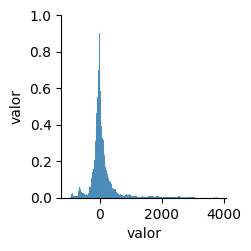

In [91]:
# Grafica de dispersion de los datos
sns.pairplot(dataset)

In [92]:
# Copia de dataset para utilizarla posteriormente
data=dataset

In [93]:
# Definición de la gráfica para cargar los valores exportados del acelerómetro Canal 1

def plot_line_chart(data):
    # Convertir el timestamp a formato de fecha y hora
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d-%b-%Y %H:%M:%S')

    # Crear un DataFrame con los datos
    df = pd.DataFrame(data)

    # Crear la gráfica de líneas
    plt.plot(df['timestamp'], df['valor'],color='b')

    # Configurar el formato de la fecha en el eje x
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b-%Y %H:%M:%S'))

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.gcf().autofmt_xdate()

    # Etiquetas y título
    plt.xlabel('Timestamp')
    plt.ylabel('Valor')
    plt.title('Gráfica de Líneas en Función del Tiempo')

    # Mostrar la gráfica
    plt.show()


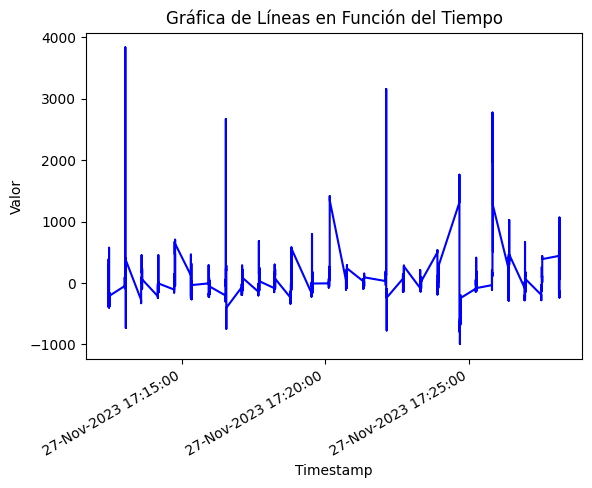

In [94]:
# Ejemplo de uso con un conjunto de datos
data_input = data

# Llamada a la función para graficar
plot_line_chart(data_input)

In [95]:
# Definición de la función para encontrar y graficar los outliers

def find_and_plot_outliers(data):
    # Convertir el timestamp a formato de fecha y hora
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d-%b-%Y %H:%M:%S')

    # Crear un DataFrame con los datos
    df = pd.DataFrame(data)

    # Calcular el rango intercuartílico (IQR)
    Q1 = df['valor'].quantile(0.25)
    Q3 = df['valor'].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para identificar outliers
    lower_limit = Q1 - 2.75 * IQR
    upper_limit = Q3 + 2.75 * IQR

    # Identificar outliers
    outliers = df[(df['valor'] < lower_limit) | (df['valor'] > upper_limit)]

    # Crear el gráfico de líneas con marcadores
    plt.plot(df['timestamp'], df['valor'], color='b', label='Datos')
    
    # Resaltar outliers en rojo
    plt.scatter(outliers['timestamp'], outliers['valor'], color='r', marker='o', label='Outliers')

    # Líneas para los límites
    plt.axhline(lower_limit, color='g', linestyle='--', label='Lower Limit')
    plt.axhline(upper_limit, color='y', linestyle='--', label='Upper Limit')

    # Configurar el formato de la fecha en el eje x
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b-%Y %H:%M:%S'))

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.gcf().autofmt_xdate()

    # Etiquetas y título
    plt.xlabel('Timestamp')
    plt.ylabel('Valor')
    plt.title('Gráfico de Líneas con Marcadores y Outliers Resaltados')

    # Mostrar la leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

C:\Users\jlerga\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


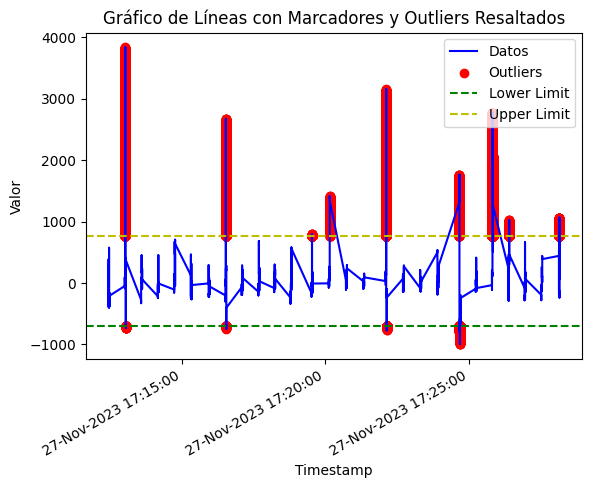

In [96]:
# Ejemplo de uso con un conjunto de datos
data_input = data

# Llamada a la función para identificar y graficar outliers
find_and_plot_outliers(data_input)

# Segunda Metodología de detección de anomalias para comparar con la primera metodología

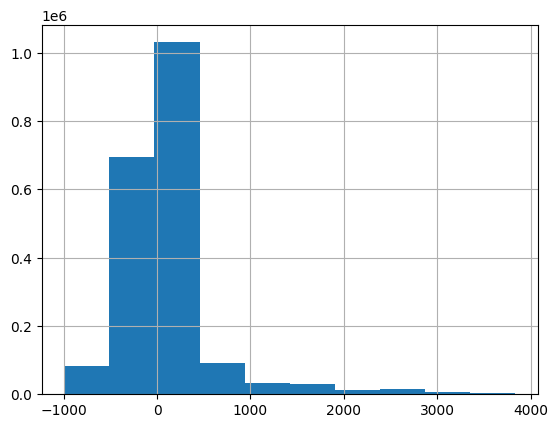

In [97]:
# Histograma de los datos recogidos por el acelerómetro Canal 1
dataset["valor"].hist()
plt.show()

In [98]:
# Calculamos la desviación estándar de los datos recogidos por el acelerómetro Canal 1
data.std()

valor                       487.942457
timestamp    0 days 00:04:42.174112581
dtype: object

In [99]:
# Volvemos a leer los datos oroginales del csv y los cargamos en un dataframe

data = pd.read_csv('20231127171227_total.csv', sep = ';', index_col=1)
data.head()

,valor
timestamp,
27-Nov-2023 17:12:27,286.40
27-Nov-2023 17:12:27,274.56
27-Nov-2023 17:12:27,259.84
27-Nov-2023 17:12:27,279.68
27-Nov-2023 17:12:27,273.28


In [100]:
# Seleccionar las primeras 2 millones de instancias
data = data.head(2000000)

In [101]:
# Visualizamos que esten correctamente cargados los datos
data

,valor
timestamp,
27-Nov-2023 17:12:27,286.40
27-Nov-2023 17:12:27,274.56
27-Nov-2023 17:12:27,259.84
27-Nov-2023 17:12:27,279.68
27-Nov-2023 17:12:27,273.28
...,...
27-Nov-2023 17:28:09,50.24
27-Nov-2023 17:28:09,69.12
27-Nov-2023 17:28:09,36.16


(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000., 2250000.]),
 [Text(-250000.0, 0, '27-Nov-2023 17:26:23'),
  Text(0.0, 0, '27-Nov-2023 17:12:27'),
  Text(250000.0, 0, '27-Nov-2023 17:14:11'),
  Text(500000.0, 0, '27-Nov-2023 17:15:58'),
  Text(750000.0, 0, '27-Nov-2023 17:18:13'),
  Text(1000000.0, 0, '27-Nov-2023 17:20:08'),
  Text(1250000.0, 0, '27-Nov-2023 17:22:08'),
  Text(1500000.0, 0, '27-Nov-2023 17:24:40'),
  Text(1750000.0, 0, '27-Nov-2023 17:26:23'),
  Text(2000000.0, 0, ''),
  Text(2250000.0, 0, '')])

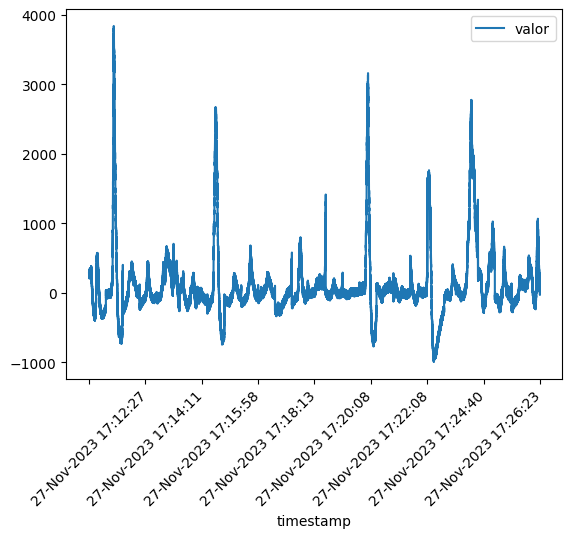

In [102]:
# Graficamos los datos
data.plot()
plt.xticks(rotation=45)

In [103]:
# Verificamos la desviación estándar de los datos
data.std()

valor    487.942457
dtype: float64

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000., 2250000.]),
 [Text(-250000.0, 0, '27-Nov-2023 17:26:23'),
  Text(0.0, 0, '27-Nov-2023 17:12:27'),
  Text(250000.0, 0, '27-Nov-2023 17:14:11'),
  Text(500000.0, 0, '27-Nov-2023 17:15:58'),
  Text(750000.0, 0, '27-Nov-2023 17:18:13'),
  Text(1000000.0, 0, '27-Nov-2023 17:20:08'),
  Text(1250000.0, 0, '27-Nov-2023 17:22:08'),
  Text(1500000.0, 0, '27-Nov-2023 17:24:40'),
  Text(1750000.0, 0, '27-Nov-2023 17:26:23'),
  Text(2000000.0, 0, ''),
  Text(2250000.0, 0, '')])

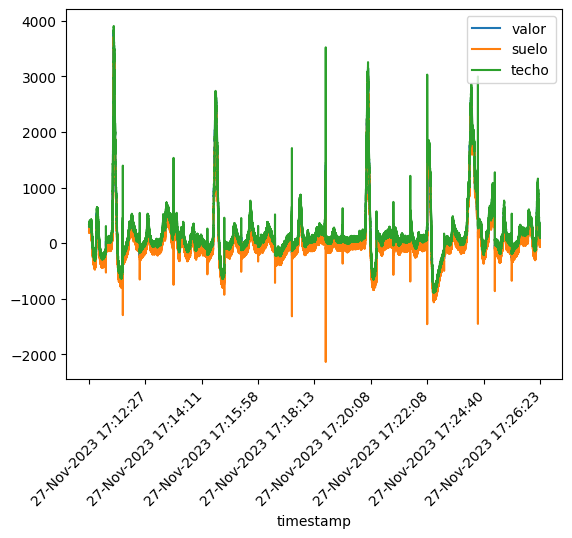

In [104]:
# Establecemos un rango de valores para identificar los outliers(vibraciones/anomalias)
wind = 22
sigma = 4

data["suelo"] = data["valor"].rolling(window=wind)\
    .mean() - (sigma * data["valor"].rolling(window=wind).std())
data["techo"] = data["valor"].rolling(window=wind)\
    .mean() + (sigma * data["valor"].rolling(window=wind).std())
data.plot()
plt.xticks(rotation=45)

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000., 2250000.]),
 [Text(-250000.0, 0, '27-Nov-2023 17:26:23'),
  Text(0.0, 0, '27-Nov-2023 17:12:27'),
  Text(250000.0, 0, '27-Nov-2023 17:14:11'),
  Text(500000.0, 0, '27-Nov-2023 17:15:58'),
  Text(750000.0, 0, '27-Nov-2023 17:18:13'),
  Text(1000000.0, 0, '27-Nov-2023 17:20:08'),
  Text(1250000.0, 0, '27-Nov-2023 17:22:08'),
  Text(1500000.0, 0, '27-Nov-2023 17:24:40'),
  Text(1750000.0, 0, '27-Nov-2023 17:26:23'),
  Text(2000000.0, 0, ''),
  Text(2250000.0, 0, '')])

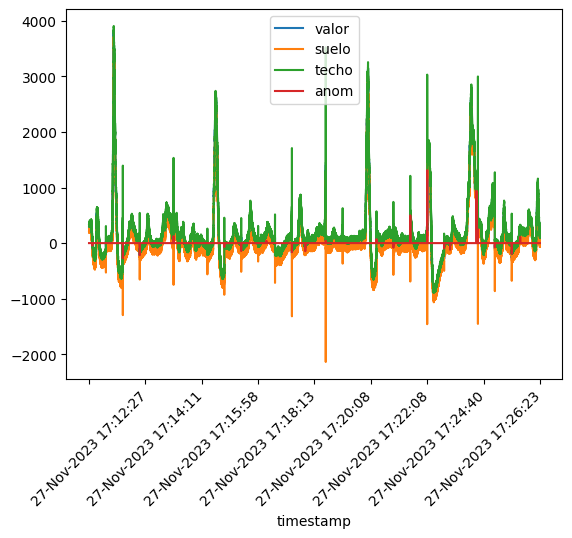

In [105]:
# Identificamos las anomalias
data["anom"] = data.apply(
    lambda row: row["valor"] if (row["valor"]<=row["suelo"] or row["valor"]>=row["techo"]) else 0
, axis=1)
data.plot()
plt.xticks(rotation=45)

In [106]:
# Mostramos un resumen estadístico de los datos
print(data.describe())

              valor         suelo         techo          anom
count  2.000000e+06  1.999979e+06  1.999979e+06  2.000000e+06
mean   9.863667e+01  2.118360e+01  1.760885e+02  8.785600e-04
std    4.879425e+02  4.855277e+02  4.911535e+02  1.271069e+00
min   -9.945600e+02 -2.139650e+03 -8.983793e+02 -2.758400e+02
25%   -8.512000e+01 -1.603377e+02 -1.195799e+01  0.000000e+00
50%    3.200000e+00 -7.149438e+01  7.986094e+01  0.000000e+00
75%    1.395200e+02  6.116681e+01  2.191986e+02  0.000000e+00
max    3.835520e+03  3.715179e+03  3.907967e+03  1.312640e+03


In [107]:
# Contar valores diferentes de cero en la columna 'anom'
cantidad_valores_no_cero = (data['anom'] != 0).sum()

print("Cantidad de valores diferentes de cero en la columna 'anom':", cantidad_valores_no_cero)

Cantidad de valores diferentes de cero en la columna 'anom': 21
